In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_check = pd.read_csv('Fraud_check.csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# Data Exploration
fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud_check.shape


(600, 6)

In [5]:
fraud_check.shape


(600, 6)

In [6]:
fraud_check[fraud_check.duplicated()].shape


(0, 6)

In [7]:
fraud_check.describe()


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
# Feature Engineering
#Converting taxable_income <= 30000 as "Risky" and others are "Good"
fraud_check1 = fraud_check.copy()
fraud_check1['Taxable.Category'] = pd.cut(x = fraud_check1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
fraud_check1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [9]:
fraud_check.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
categorical_features = fraud_check.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [11]:
numerical_features = fraud_check.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

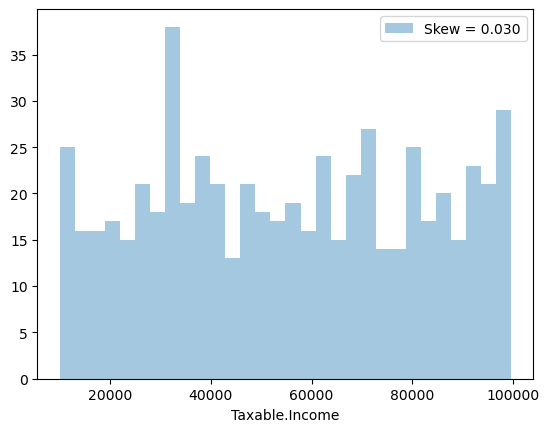

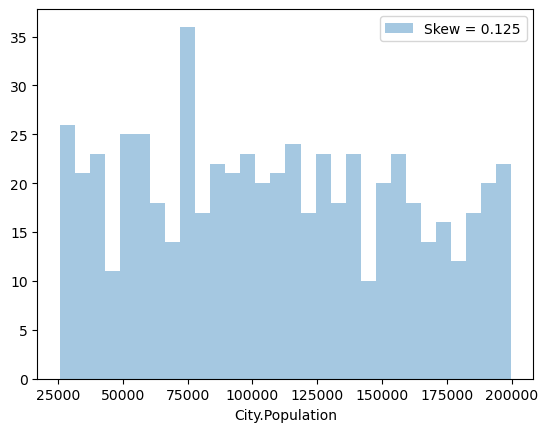

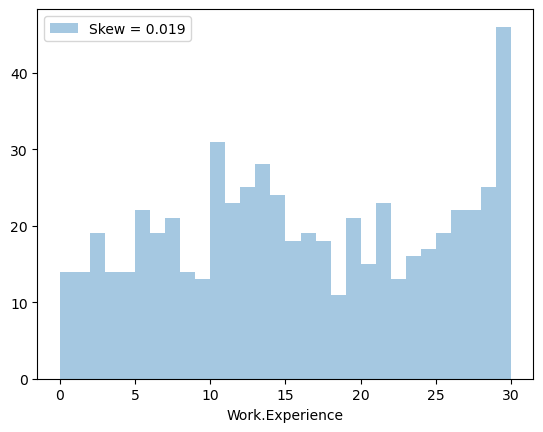

In [12]:
#Exploratory Data Analysis
#Univariate plots

numerical_features = [feature for feature in fraud_check.columns if fraud_check[feature].dtypes != 'O']
for feat in numerical_features:
    skew = fraud_check[feat].skew()
    sns.distplot(fraud_check[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [13]:
# Observation
None of the features is normally distributed.

SyntaxError: invalid syntax (1094943217.py, line 2)

In [14]:
# Outliers
numerical_features

['Taxable.Income', 'City.Population', 'Work.Experience']

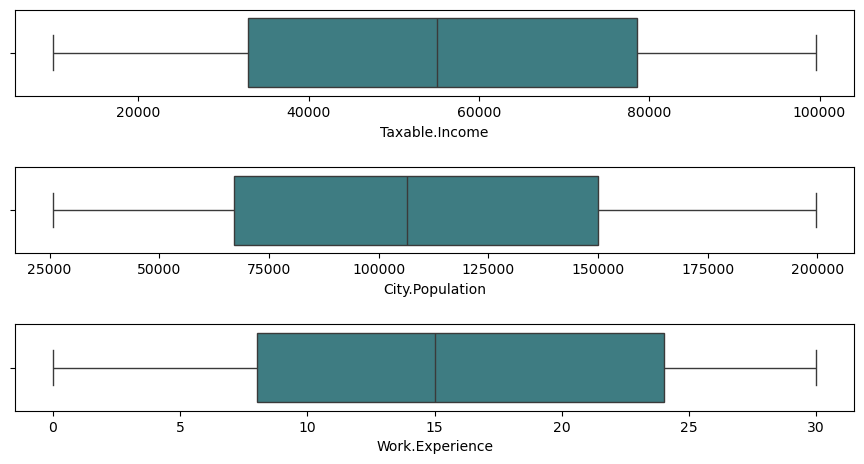

In [15]:
outlier = fraud_check.copy() 
fig, axes = plt.subplots(3,1,figsize=(9,5),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data= outlier,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

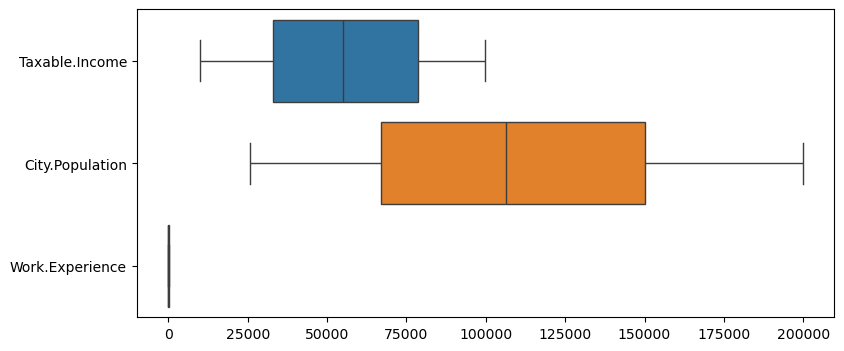

In [16]:
plt.figure(figsize=(9,4))
sns.boxplot(data= fraud_check[numerical_features], orient="h")
plt.show()

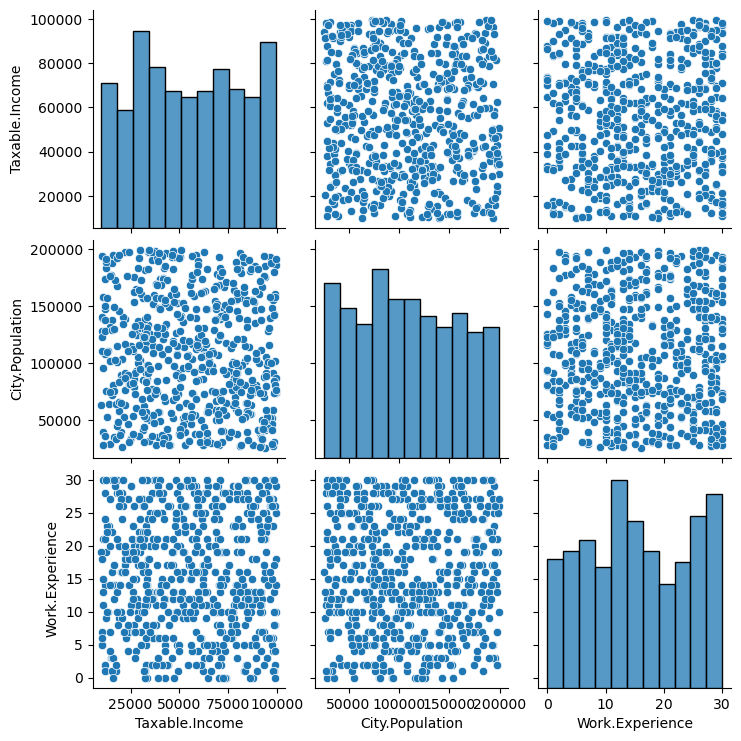

In [17]:
# Multivariate Analysis

sns.pairplot(fraud_check, palette='coolwarm')
plt.show()

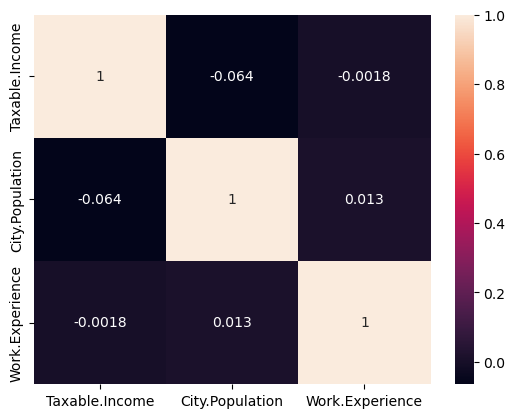

In [18]:
# Having a look at the correlation matrix
sns.heatmap(fraud_check.corr(), annot=True)
plt.show()

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


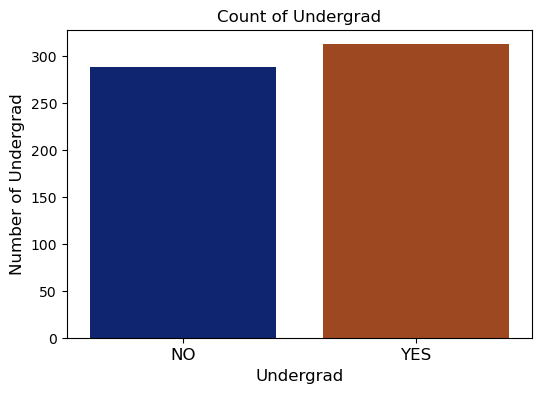

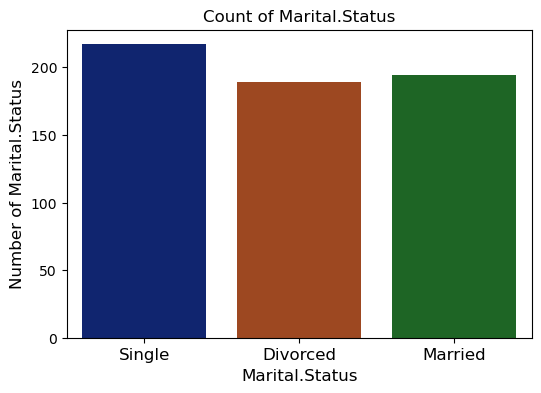

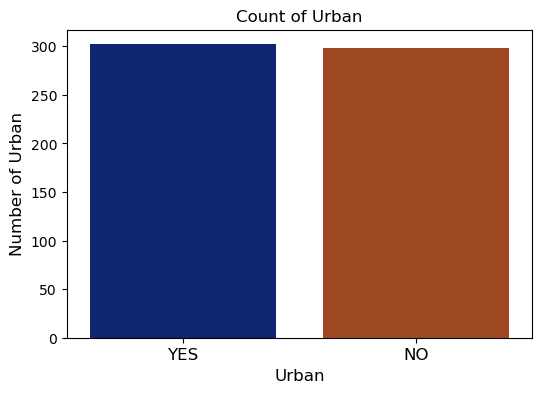

In [19]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(6,4))
    unique = fraud_check[column].value_counts(ascending=True);
   
    plt.title("Count of "+ column)
    sns.countplot(data= fraud_check, x=column,palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

In [33]:
def factorplot(param):
    sns.catplot(x = param, size = 5, aspect = 2, data = fraud_check, y= "Taxable.Income", palette = "dark")
    plt.xlabel("\n" + param)
    plt.ylabel("Sales\n")
    plt.show()

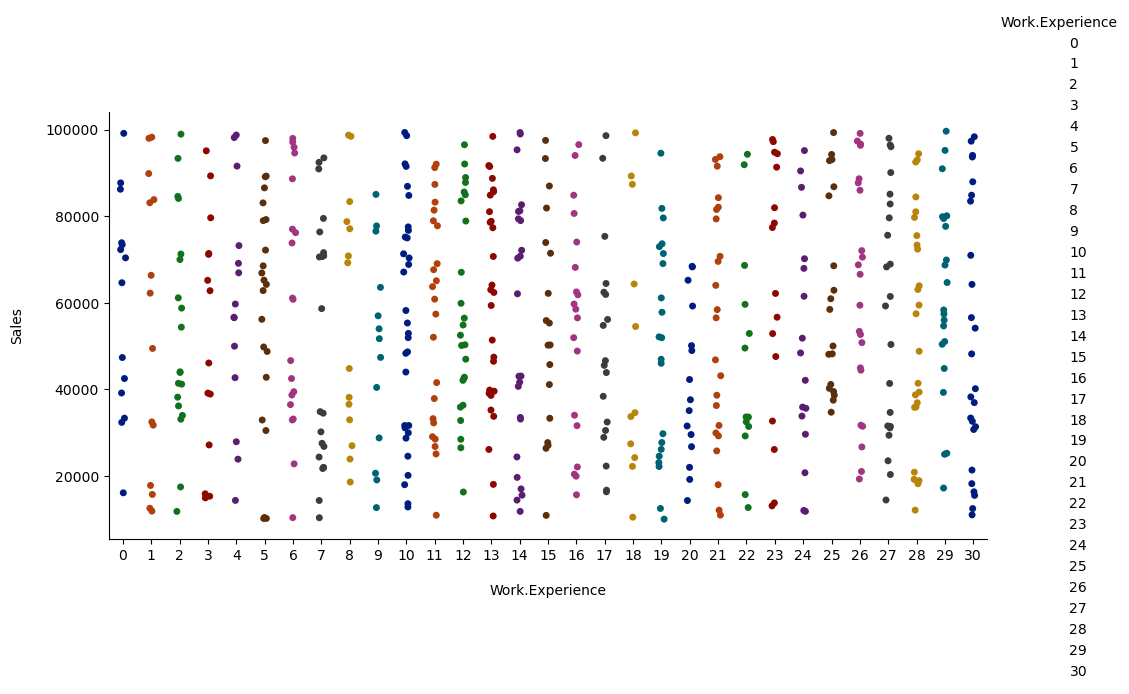

In [34]:
factorplot("Work.Experience")


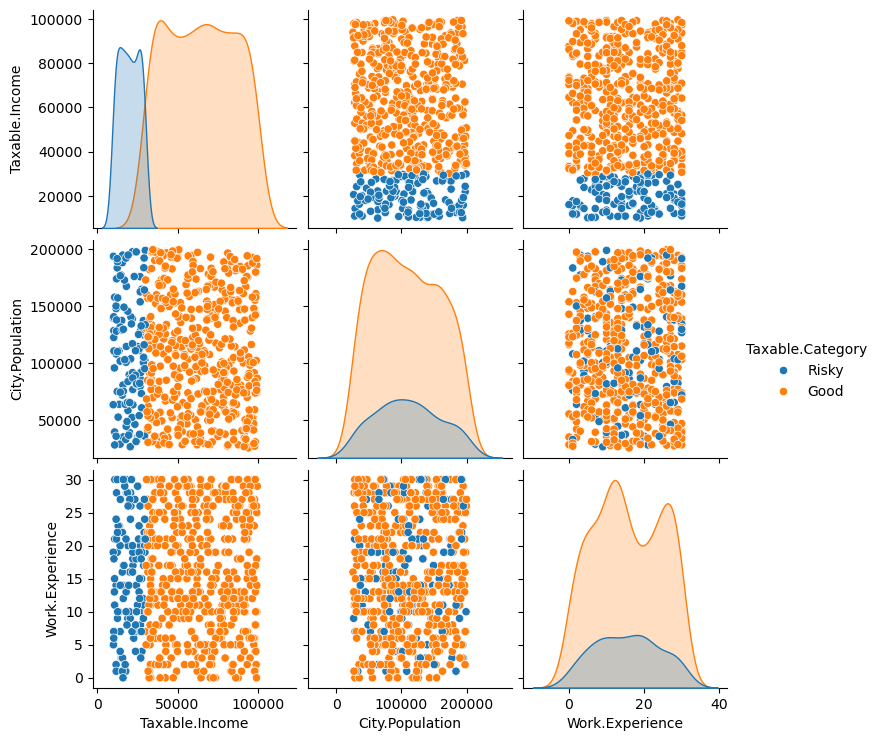

In [35]:
# Let's plot pair plot to visualise the attributes all at once
sns.pairplot(data= fraud_check1, hue = 'Taxable.Category')
plt.show()

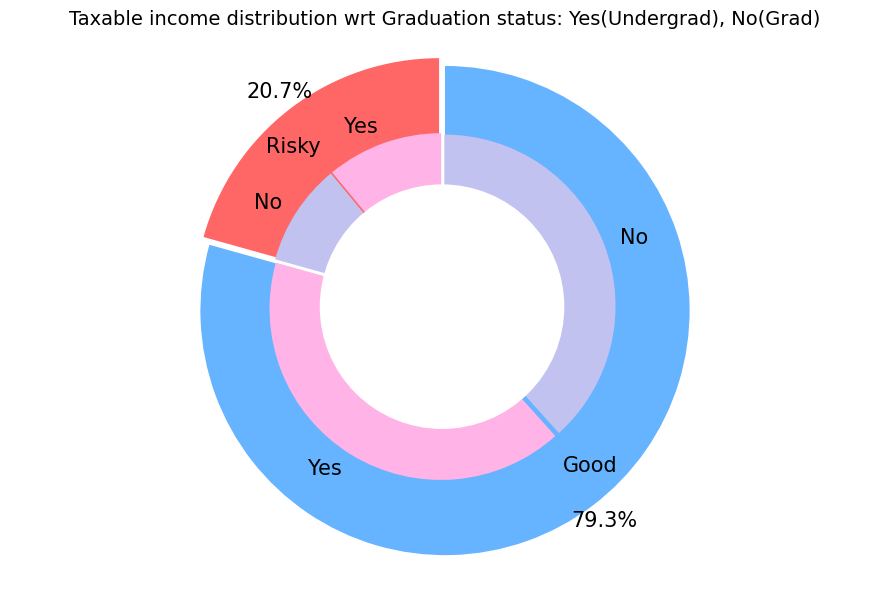

In [37]:
plt.figure(figsize=(9,6))
labels =["Risky", "Good"]
values = [fraud_check1["Taxable.Category"][fraud_check1["Taxable.Category"] == 'Risky'].groupby(by = fraud_check1.Undergrad).count().sum(),
         fraud_check1["Taxable.Category"][fraud_check1["Taxable.Category"] == 'Good'].groupby(by = fraud_check1.Undergrad).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [66,58 , 246,230]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15, 'rotation':'horizontal'}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution wrt Graduation status: Yes(Undergrad), No(Grad)', fontsize= 14)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

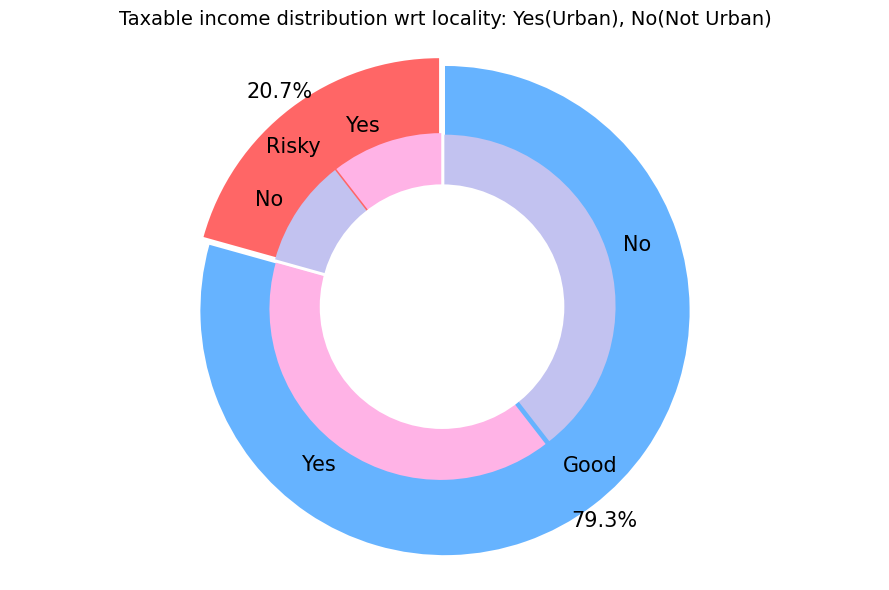

In [38]:
plt.figure(figsize=(9,6))
labels =["Risky", "Good"]
values = [fraud_check1["Taxable.Category"][fraud_check1["Taxable.Category"] == 'Risky'].groupby(by = fraud_check1["Urban"]).count().sum(),
         fraud_check1["Taxable.Category"][fraud_check1["Taxable.Category"] == 'Good'].groupby(by = fraud_check1["Urban"]).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [63,61 , 239,237]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15, 'rotation':'horizontal'}
#Plot
plt.pie(values, labels=labels, autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution wrt locality: Yes(Urban), No(Not Urban)', fontsize=14)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

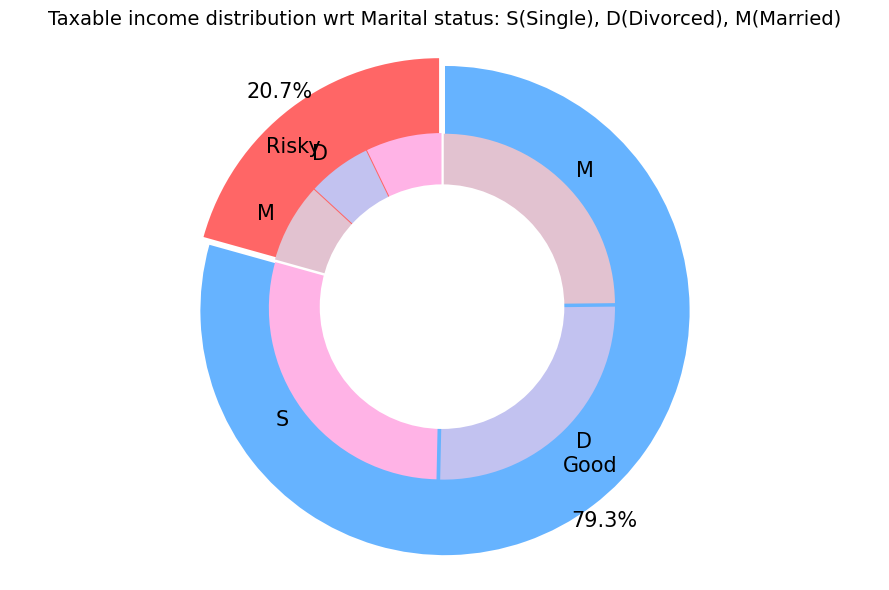

In [40]:
plt.figure(figsize=(9,6))
labels =["Risky", "Good"]
values = [fraud_check1["Taxable.Category"][fraud_check1["Taxable.Category"] == 'Risky'].groupby(by = fraud_check1["Marital.Status"]).count().sum(),
         fraud_check1["Taxable.Category"][fraud_check1["Taxable.Category"] == 'Good'].groupby(by = fraud_check1["Marital.Status"]).count().sum()]
labels_gender = ["","D","M","S","D", "M"]
sizes_gender = [43,36,45,174,153,149]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#e2c2d0','#ffb3e6', '#c2c2f0', '#e2c2d0']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1)
textprops = {"fontsize":15, 'rotation':'horizontal'}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution wrt Marital status: S(Single), D(Divorced), M(Married)', fontsize=14)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

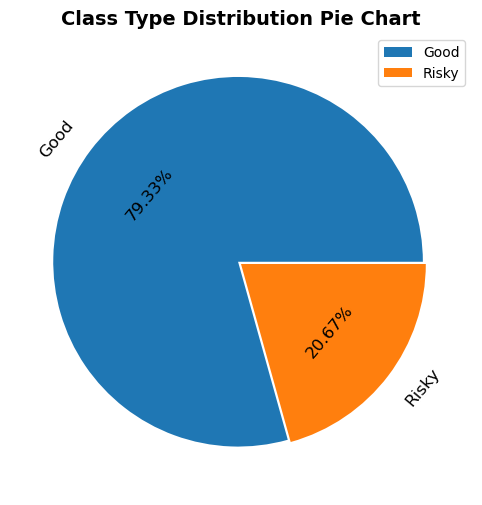

In [41]:
# Checking for Imbalanced or balanced dataset with regards to the Target
plt.figure(figsize = (9,6))
plt.pie(fraud_check1['Taxable.Category'].value_counts(),labels= fraud_check1['Taxable.Category'].unique(),
       explode = [0.02,0.0], autopct= '%.2f%%',textprops = {'size':'large','rotation':50,'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 14, fontweight = 'bold')
plt.show()

In [42]:
fraud_check1['Taxable.Category'].value_counts()


Good     476
Risky    124
Name: Taxable.Category, dtype: int64

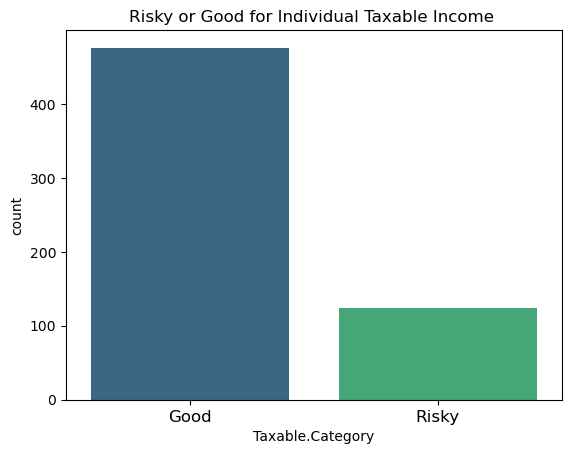

In [43]:
sns.countplot(x='Taxable.Category', data=fraud_check1, palette = 'viridis', order=fraud_check1['Taxable.Category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')
plt.show()

In [44]:
# Data Pre-Processing
fraud_check1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Taxable.Category'],
      dtype='object')

In [45]:
fraud_check2 = fraud_check1.copy()
fraud_check2.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience','Taxable.Category':'Taxable_Category'}, inplace = True)
fraud_check2.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = fraud_check2.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'Taxable_Category'], dtype='object')

In [46]:
#Lable Encoding
#Creating dummy vairables of the categorical features
fraud_check2.columns 


Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban', 'Taxable_Category'],
      dtype='object')

In [47]:
le = LabelEncoder()
for col in categorical_features:
        le.fit(fraud_check2[col])
        fraud_check2[col] = le.transform(fraud_check2[col])
fraud_check2.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [48]:
fraud_check2.Taxable_Category.value_counts()


0    476
1    124
Name: Taxable_Category, dtype: int64

In [49]:
# Model Building
#StratifiedKFold
x = fraud_check2.drop('Taxable_Category',axis=1)
y = fraud_check2[['Taxable_Category']]

In [50]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60


In [51]:
# Test Train Split With Imbalanced Dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

In [52]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=480, 1=480, Test: 0=120, 1=120


In [53]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({'Taxable_Category': 1}) Testing Data Counter({'Taxable_Category': 1})


In [54]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (480, 5)
Shape of x_test  :  (120, 5)
Shape of y_train :  (480, 1)
Shape of y_test  :  (120, 1)


In [55]:
# Model Training And Testing
#Grid Search using Stratified Kfold Splits on Imbalanced Dataset

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [56]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], 
          "max_depth":[2,3,4,5,6,7,8], "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=12)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_x, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_x, train_y)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=True)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=False)

Fitting 3 folds for each of 1372 candidates, totalling 4116 fits
Best paramters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 80.37%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.807619    0.666667  0.803704    0.737143      0.778646
recall       0.988345    0.090090  0.803704    0.539218      0.803704
f1-score     0.888889    0.158730  0.803704    0.523810      0.738801
support    429.000000  111.000000  0.803704  540.000000    540.000000
__________________________________________________________________________
Confusion Matrix: 
 [[424   5]
 [101  10]]

Test Result:
Accuracy Score: 76.67%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy  macro avg  weighted avg
precision  

In [57]:
#Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf1 = StratifiedKFold(n_splits=15, shuffle=True, random_state=12)

results = cross_val_score(decision_tree, train_x, train_y, cv=skf1)
print(results.mean())

0.6203703703703703


In [58]:
params1 = {"criterion":["gini","entropy"], "max_depth":[2,3,4,5,6,7,8],
              "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

grid = GridSearchCV(decision_tree, param_grid = params1, cv=skf1, verbose=1, n_jobs=6)
grid.fit(train_x,train_y)
model1 = grid.best_estimator_

Fitting 15 folds for each of 686 candidates, totalling 10290 fits


In [59]:
grid.best_score_


0.7925925925925928

In [60]:
predict_output1 = model1.predict(test_x)
accuracy_test1 = accuracy_score(test_y,predict_output1)
accuracy_test1

0.7833333333333333

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        47
           1       0.00      0.00      0.00        13

    accuracy                           0.78        60
   macro avg       0.39      0.50      0.44        60
weighted avg       0.61      0.78      0.69        60



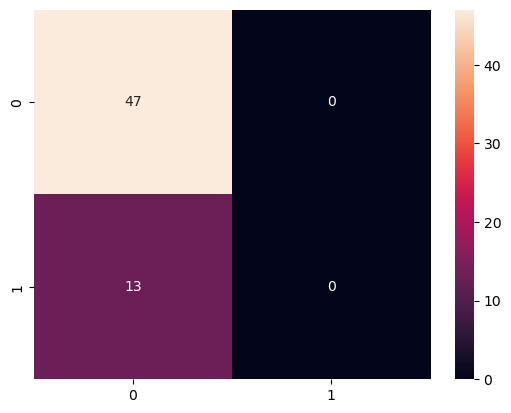

In [61]:
sns.heatmap(confusion_matrix(test_y, predict_output1), annot=True)
print(classification_report(test_y,predict_output1))

In [62]:
# Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], 
          "max_depth":[2,3,4,5,6,7,8], "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=22)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 1372 candidates, totalling 4116 fits
Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 79.38%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.793750   0.0   0.79375    0.396875      0.630039
recall       1.000000   0.0   0.79375    0.500000      0.793750
f1-score     0.885017   0.0   0.79375    0.442509      0.702483
support    381.000000  99.0   0.79375  480.000000    480.000000
__________________________________________________________________________
Confusion Matrix: 
 [[381   0]
 [ 99   0]]

Test Result:
Accuracy Score: 79.17%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy   macro avg  weighted avg
precision   0.791667   0.0  0.791667    

In [63]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf2 = StratifiedKFold(n_splits=15, shuffle=True, random_state=14)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf2)
print(results.mean())

0.6416666666666667


In [64]:
params2 = {"criterion":["gini","entropy"], "max_depth":[2,3,4,5,6,7,8],
              "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

grid = GridSearchCV(decision_tree, param_grid = params2, cv=skf2, verbose=1, n_jobs=6)
grid.fit(x_train,y_train)
model2 = grid.best_estimator_

Fitting 15 folds for each of 686 candidates, totalling 10290 fits


In [65]:
grid.best_score_


0.7958333333333333

In [66]:
predict_output2 = model2.predict(x_test)
accuracy_test2 = accuracy_score(y_test,predict_output2)
accuracy_test2

0.7916666666666666

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



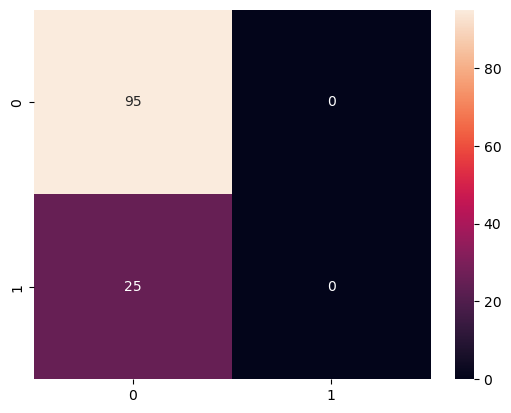

In [67]:
sns.heatmap(confusion_matrix(y_test, predict_output2),annot=True)
print(classification_report(y_test,predict_output2))

In [68]:
#Pruning
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":[2,3,4,5,6,7,8], 
          "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=123)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 1372 candidates, totalling 13720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 79.79%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.797071   1.000000  0.797917    0.898536      0.838925
recall       1.000000   0.020202  0.797917    0.510101      0.797917
f1-score     0.887078   0.039604  0.797917    0.463341      0.712286
support    381.000000  99.000000  0.797917  480.000000    480.000000
__________________________________________________________________________
Confusion Matrix: 
 [[381   0]
 [ 97   2]]

Test Result:
Accuracy Score: 79.17%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy   macro avg  weighted avg
precision   

In [69]:
clf = DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [70]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [71]:
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.798
Testing Accuracy  : 0.792


In [72]:
# Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=10)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

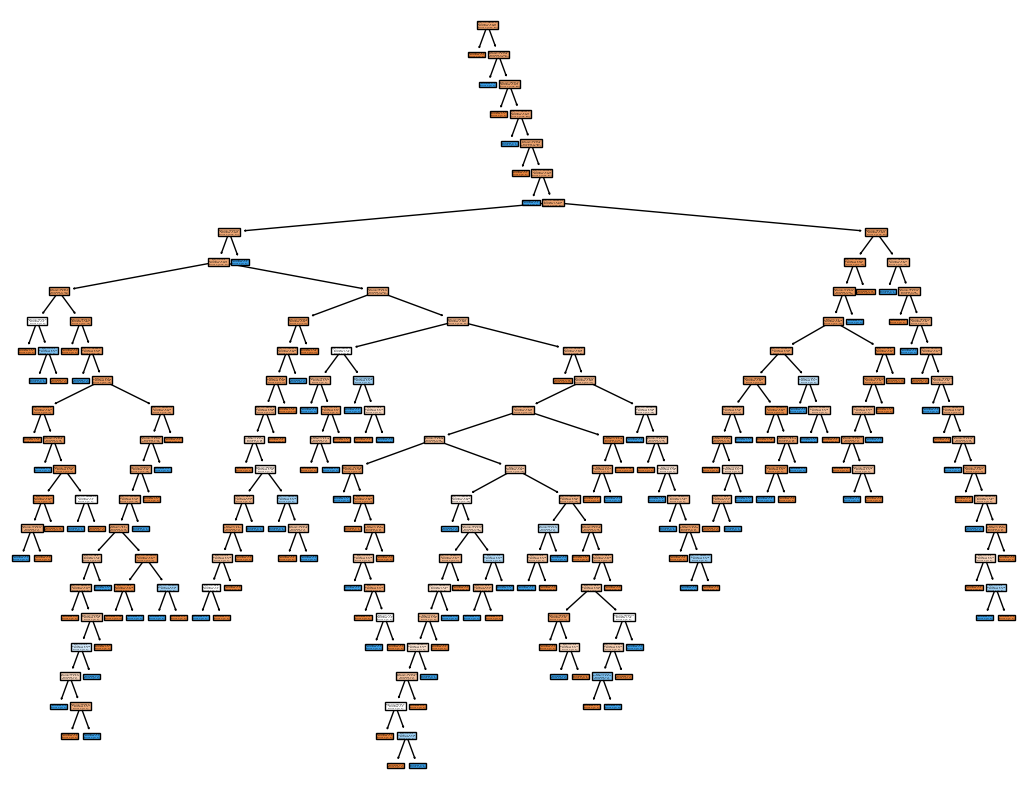

In [73]:
plt.figure(figsize=(13,10))
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [74]:
#Predicting on test data
preds = model_entropy.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    95
1    25
dtype: int64

In [75]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        95
           1       0.20      0.20      0.20        25

    accuracy                           0.67       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.67      0.67      0.67       120



In [76]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [77]:
path

{'ccp_alphas': array([0.        , 0.00270843, 0.00359198, 0.00376004, 0.00378403,
        0.00399232, 0.00406264, 0.00406264, 0.00416667, 0.00444339,
        0.00446189, 0.00446189, 0.0047893 , 0.00490184, 0.00504487,
        0.00505703, 0.00505703, 0.00505703, 0.00505703, 0.00540736,
        0.00573935, 0.00573935, 0.00603559, 0.00603559, 0.00604177,
        0.00611366, 0.00612848, 0.00625   , 0.00640215, 0.00649961,
        0.00658087, 0.00691539, 0.00705756]),
 'impurities': array([0.        , 0.00812528, 0.02249319, 0.03001327, 0.04136538,
        0.04535769, 0.05348298, 0.06160826, 0.06577492, 0.08799185,
        0.09245374, 0.09691564, 0.11128355, 0.12598907, 0.13607881,
        0.14619288, 0.15630695, 0.16642102, 0.17653509, 0.22520128,
        0.23094063, 0.23667998, 0.24271558, 0.24875117, 0.26083472,
        0.36476693, 0.37089541, 0.38339541, 0.47302555, 0.53802162,
        0.55118336, 0.57192952, 0.73425334])}

In [78]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=11, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.007057557152094937


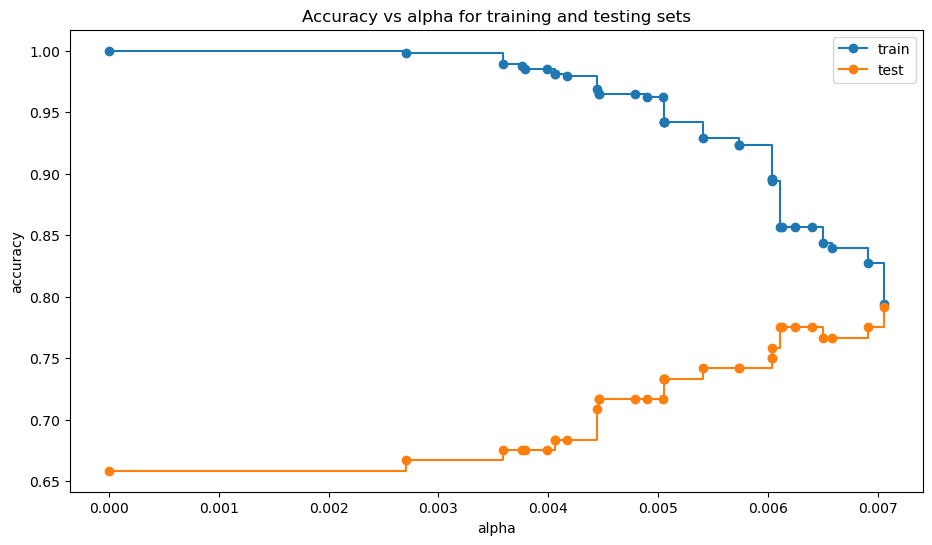

In [79]:
# Accuracy vs alpha for training and testing sets
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [80]:
# Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=144, ccp_alpha=0.00705)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00705, criterion='entropy', random_state=144)

In [81]:
pred_train1 = clf1.predict(x_train)
pred_test1 = clf1.predict(x_test)

print('Training Accuracy :',accuracy_score(y_train, pred_train1).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test1).round(3))

Training Accuracy : 0.827
Testing Accuracy  : 0.775


              precision    recall  f1-score   support

           0       0.79      0.97      0.87        95
           1       0.25      0.04      0.07        25

    accuracy                           0.78       120
   macro avg       0.52      0.50      0.47       120
weighted avg       0.68      0.78      0.70       120



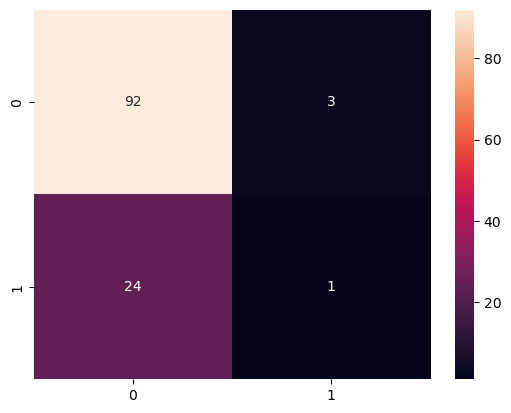

In [82]:
sns.heatmap(confusion_matrix(y_test, pred_test1),annot=True)
print(classification_report(y_test,pred_test1))

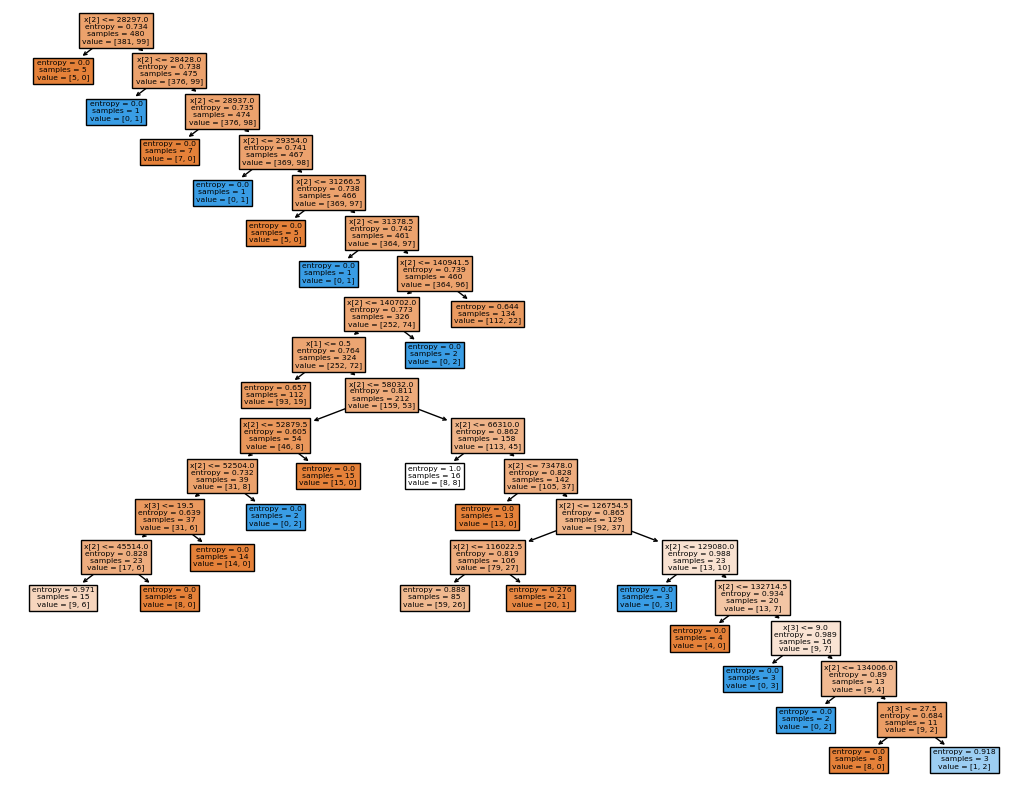

In [83]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf1,filled=True)
plt.show()

In [84]:
#Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning
model_gini = DecisionTreeClassifier(criterion='gini', random_state=10)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

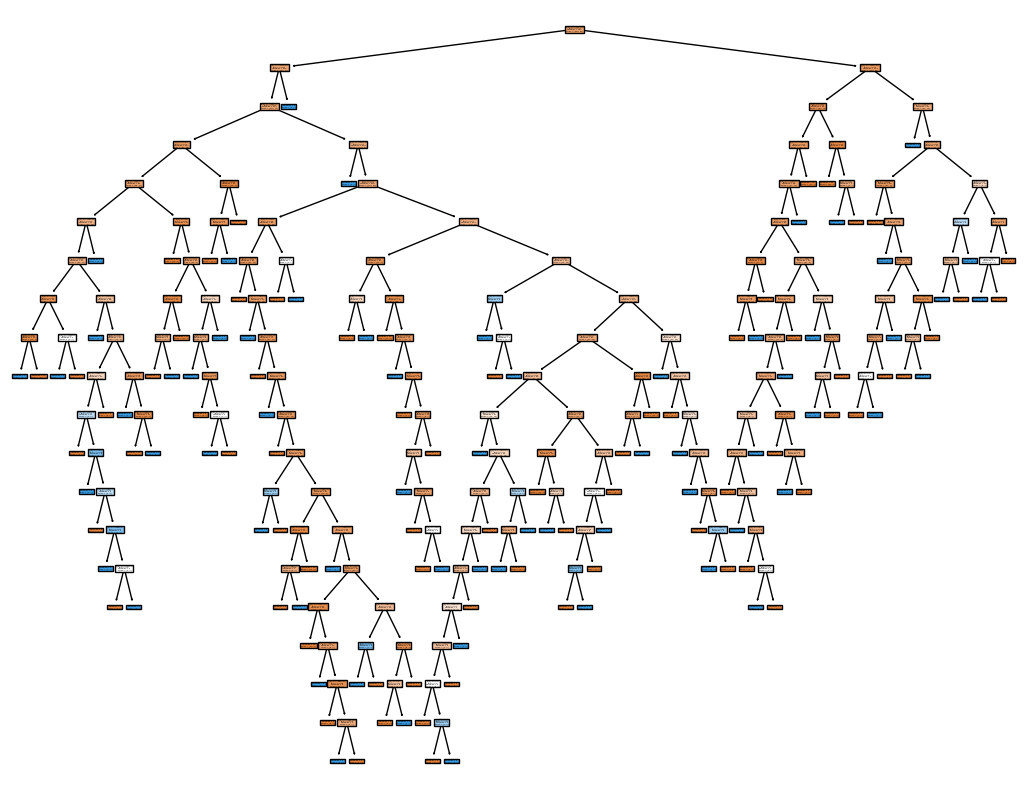

In [85]:
plt.figure(figsize=(13,10))
tree.plot_tree(model_gini,filled=True)
plt.show()

In [86]:
# Predicting on test data
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    91
1    29
dtype: int64

In [87]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        95
           1       0.24      0.28      0.26        25

    accuracy                           0.67       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.69      0.67      0.68       120



In [88]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [89]:
path

{'ccp_alphas': array([0.        , 0.00148148, 0.0015625 , 0.00166667, 0.00166667,
        0.00173611, 0.0017402 , 0.00175   , 0.00178571, 0.00185185,
        0.00185185, 0.001875  , 0.00193603, 0.00195312, 0.00196036,
        0.00196078, 0.00196759, 0.00198413, 0.0019958 , 0.00200321,
        0.00200321, 0.00203237, 0.00208333, 0.00208333, 0.00217419,
        0.00234299, 0.00255323, 0.00256944, 0.00267857, 0.00270792,
        0.00277778, 0.00277778, 0.00297794, 0.003125  , 0.003125  ,
        0.00330913, 0.00331563, 0.00333965, 0.00334205, 0.00334495,
        0.00369326, 0.00456092]),
 'impurities': array([0.        , 0.00740741, 0.01365741, 0.01699074, 0.02032407,
        0.0237963 , 0.03075708, 0.03950708, 0.04307851, 0.04678221,
        0.05048592, 0.05423592, 0.05810797, 0.06201422, 0.06593494,
        0.06985651, 0.07379169, 0.07775995, 0.08175154, 0.08575795,
        0.08976436, 0.11821757, 0.1203009 , 0.12238423, 0.13108098,
        0.1545109 , 0.1621706 , 0.16730948, 0.16998806

In [90]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.004560921628414483


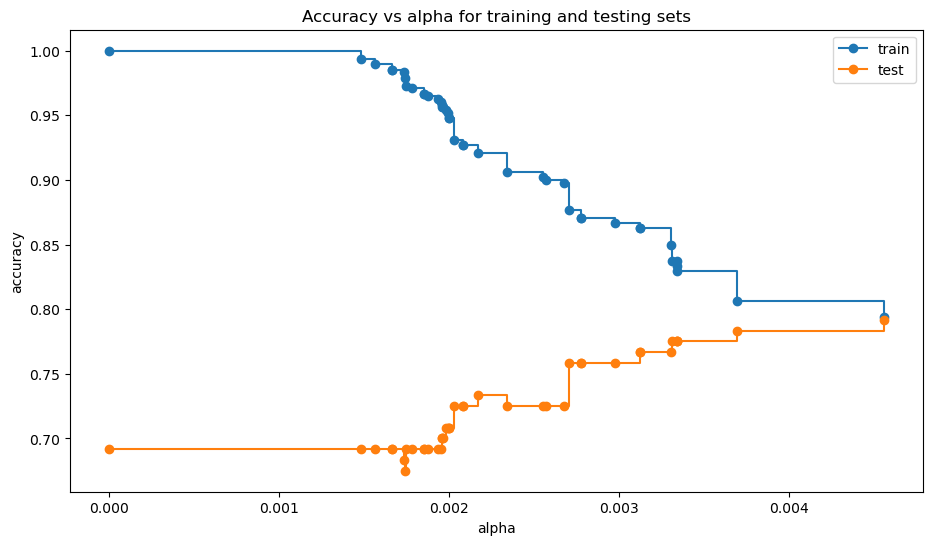

In [91]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [92]:
# Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other
clf2 = DecisionTreeClassifier(criterion='gini',random_state=145, ccp_alpha=0.00456)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00456, random_state=145)

In [93]:
pred_train2 = clf2.predict(x_train)
pred_test2 = clf2.predict(x_test)

print('Training Accuracy :',accuracy_score(y_train, pred_train2).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test2).round(3))

Training Accuracy : 0.806
Testing Accuracy  : 0.783


              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



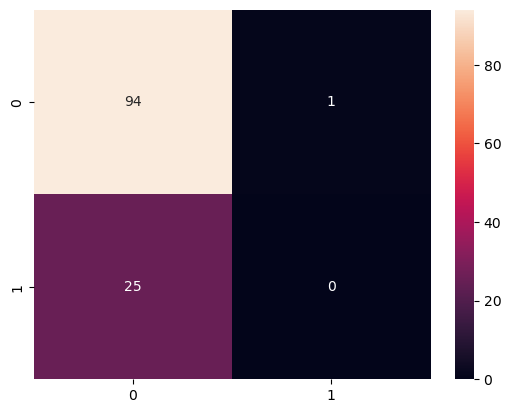

In [94]:
sns.heatmap(confusion_matrix(y_test, pred_test2),annot=True)
print(classification_report(y_test,pred_test2))

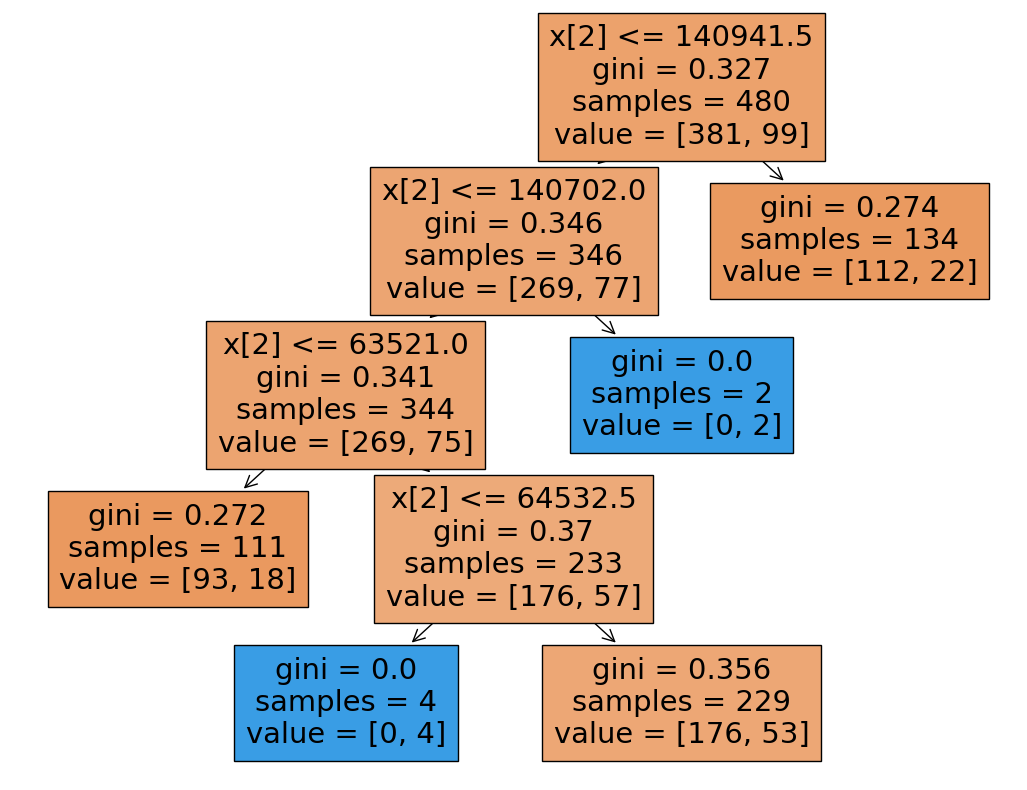

In [95]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf2,filled=True)
plt.show()

In [96]:
# Model Optimization
#Using best paramters: 'criterion': 'entropy', 'max_depth': 3 (GridSearchCV)
print(f"Training Accuracy: {accuracy_score(y_train, pred_train) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test) * 100:.2f}%")

Training Accuracy: 79.79%
Testing Accuracy : 79.17%


In [97]:
#Using Entropy Criteria with Alpha values
print(f"Training Accuracy: {accuracy_score(y_train, pred_train1) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test1) * 100:.2f}%")

Training Accuracy: 82.71%
Testing Accuracy : 77.50%


In [98]:
#Using Gini Criteria with Alpha values
print(f"Training Accuracy: {accuracy_score(y_train, pred_train2) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test2) * 100:.2f}%")

Training Accuracy: 80.62%
Testing Accuracy : 78.33%
